<a href="https://colab.research.google.com/github/nadireus/Machine-Learning/blob/main/Tree_Types_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### *ii. Load Dataset*

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/treetypes.csv')

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

Data Set Information:

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.


Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name / Data Type / Measurement / Description

Elevation / quantitative /meters / Elevation in meters

Aspect / quantitative / azimuth / Aspect in degrees azimuth

Slope / quantitative / degrees / Slope in degrees

Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway

Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice

Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice

Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points

Wilderness_Area (4 binary columns) / qualitative / 

0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) /

 Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

***
***

In [ ]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [ ]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm'
 'Horizontal_Distance_To_Fire_Points' 'Wilderness_Area_1'
 'Wilderness_Area_2' 'Wilderness_Area_3' 'Wilderness_Area_4' 'Soil_Type_1'
 'Soil_Type_2' 'Soil_Type_3' 'Soil_Type_4' 'Soil_Type_5' 'Soil_Type_6'
 'Soil_Type_7' 'Soil_Type_8' 'Soil_Type_9' 'Soil_Type_10' 'Soil_Type_11'
 'Soil_Type_12' 'Soil_Type_13' 'Soil_Type_14' 'Soil_Type_15'
 'Soil_Type_16' 'Soil_Type_17' 'Soil_Type_18' 'Soil_Type_19'
 'Soil_Type_20' 'Soil_Type_21' 'Soil_Type_22' 'Soil_Type_23'
 'Soil_Type_24' 'Soil_Type_25' 'Soil_Type_26' 'Soil_Type_27'
 'Soil_Type_28' 'Soil_Type_29' 'Soil_Type_30' 'Soil_Type_31'
 'Soil_Type_32' 'Soil_Type_33' 'Soil_Type_34' 'Soil_Type_35'
 'Soil_Type_36' 'Soil_Type_37' 'Soil_Type_38' 'Soil_Type_39'
 'Soil_Type_40' 'Cover_Type']


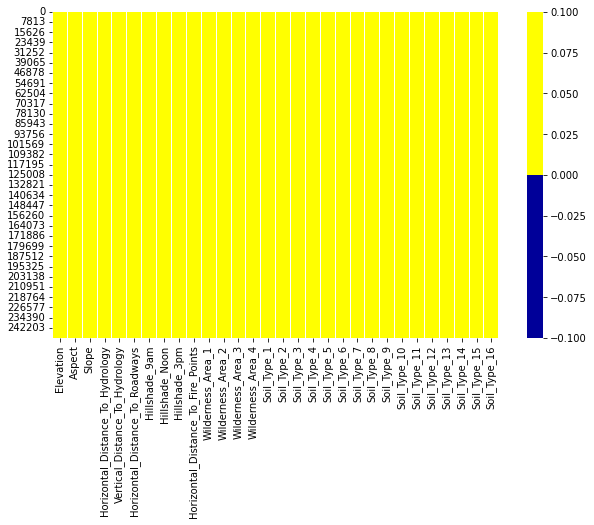

In [ ]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is  missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

## 2.  Data Cleaning


###Categorical Variables

In [ ]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

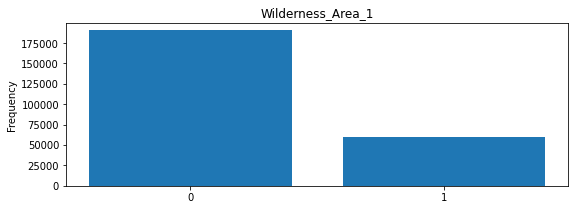

Wilderness_Area_1: 
 0    190425
1     59575
Name: Wilderness_Area_1, dtype: int64


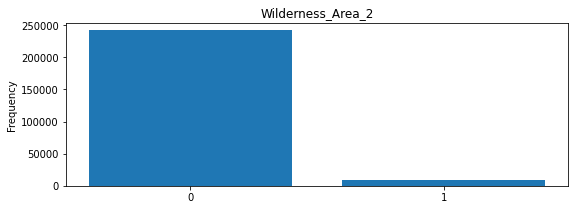

Wilderness_Area_2: 
 0    241660
1      8340
Name: Wilderness_Area_2, dtype: int64


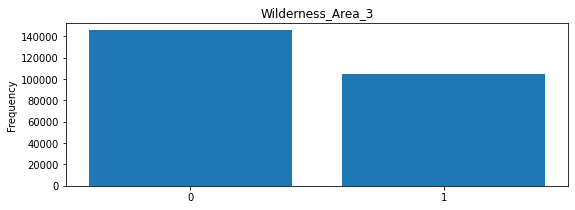

Wilderness_Area_3: 
 0    145544
1    104456
Name: Wilderness_Area_3, dtype: int64


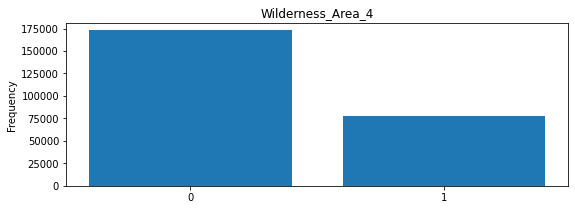

Wilderness_Area_4: 
 0    172827
1     77173
Name: Wilderness_Area_4, dtype: int64


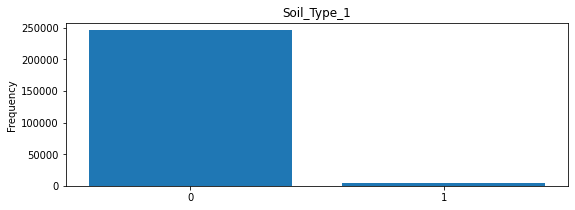

Soil_Type_1: 
 0    245414
1      4586
Name: Soil_Type_1, dtype: int64


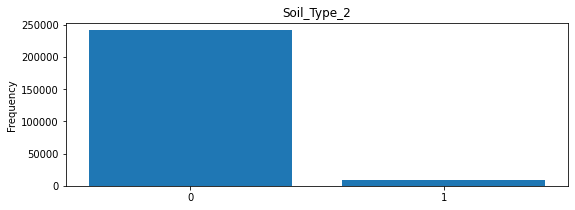

Soil_Type_2: 
 0    241034
1      8966
Name: Soil_Type_2, dtype: int64


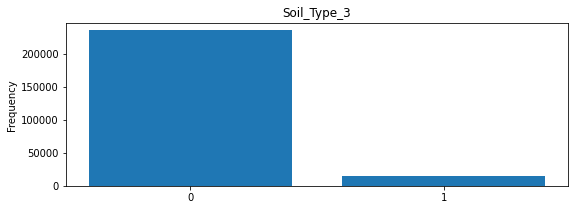

Soil_Type_3: 
 0    235406
1     14594
Name: Soil_Type_3, dtype: int64


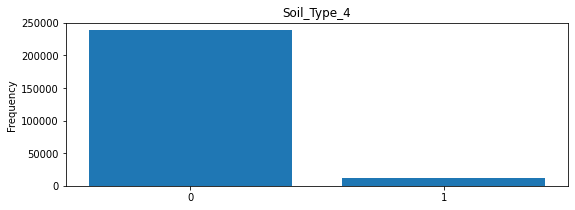

Soil_Type_4: 
 0    238270
1     11730
Name: Soil_Type_4, dtype: int64


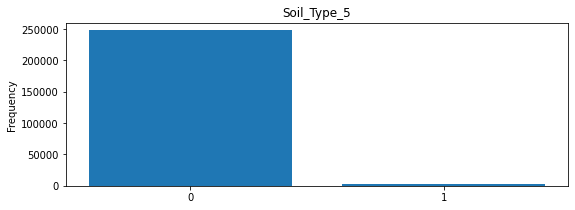

Soil_Type_5: 
 0    247741
1      2259
Name: Soil_Type_5, dtype: int64


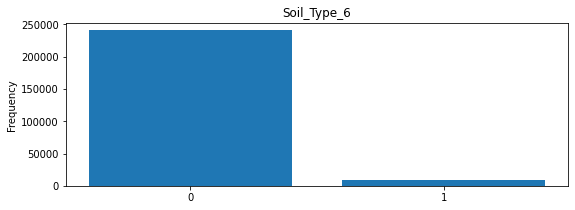

Soil_Type_6: 
 0    240651
1      9349
Name: Soil_Type_6, dtype: int64


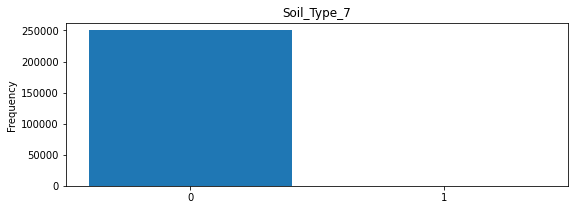

Soil_Type_7: 
 0    249985
1        15
Name: Soil_Type_7, dtype: int64


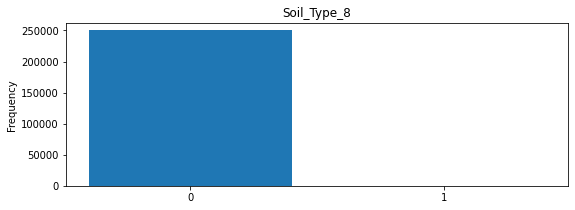

Soil_Type_8: 
 0    249977
1        23
Name: Soil_Type_8, dtype: int64


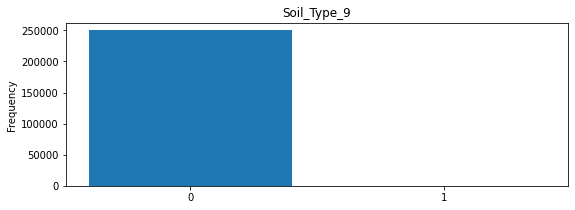

Soil_Type_9: 
 0    249847
1       153
Name: Soil_Type_9, dtype: int64


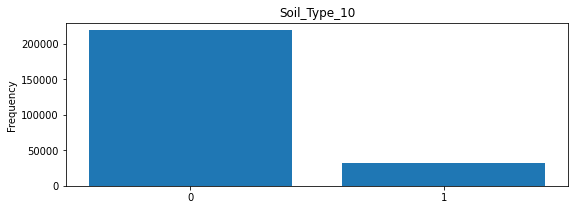

Soil_Type_10: 
 0    218467
1     31533
Name: Soil_Type_10, dtype: int64


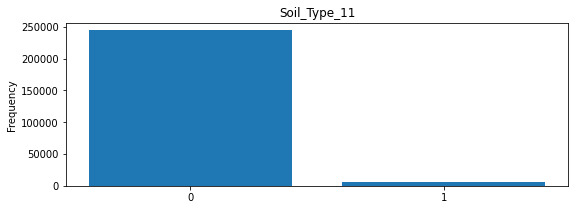

Soil_Type_11: 
 0    244099
1      5901
Name: Soil_Type_11, dtype: int64


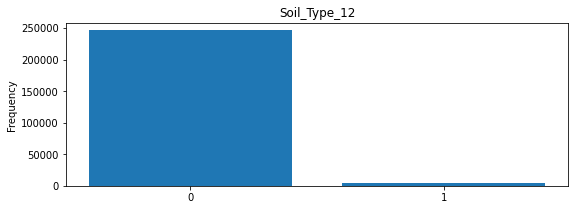

Soil_Type_12: 
 0    246066
1      3934
Name: Soil_Type_12, dtype: int64


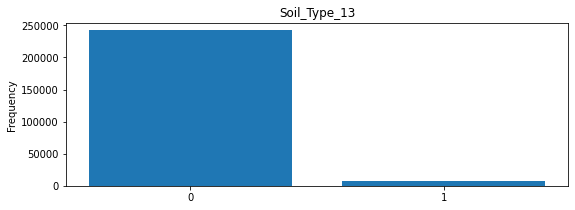

Soil_Type_13: 
 0    241983
1      8017
Name: Soil_Type_13, dtype: int64


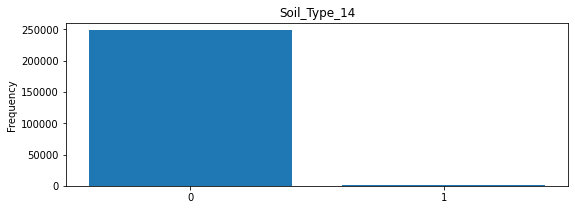

Soil_Type_14: 
 0    248423
1      1577
Name: Soil_Type_14, dtype: int64


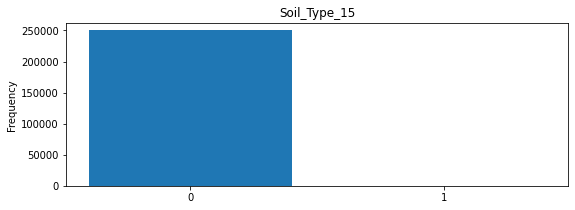

Soil_Type_15: 
 0    249999
1         1
Name: Soil_Type_15, dtype: int64


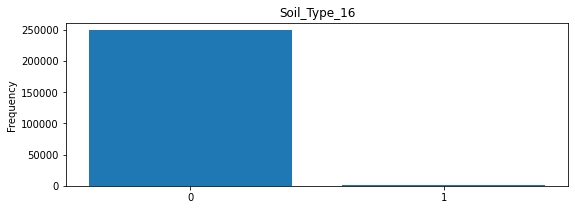

Soil_Type_16: 
 0    248849
1      1151
Name: Soil_Type_16, dtype: int64


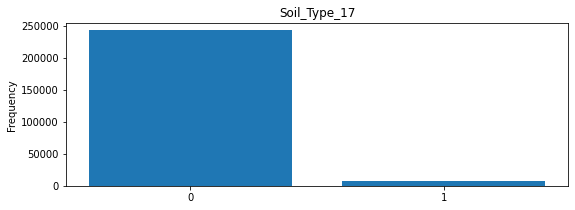

Soil_Type_17: 
 0    242367
1      7633
Name: Soil_Type_17, dtype: int64


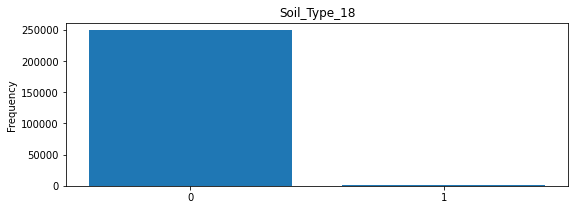

Soil_Type_18: 
 0    249121
1       879
Name: Soil_Type_18, dtype: int64


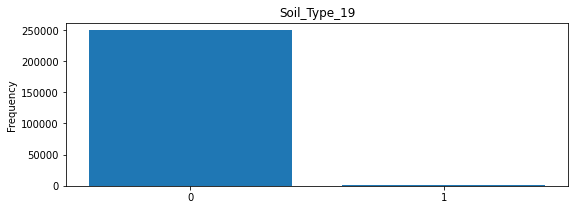

Soil_Type_19: 
 0    249283
1       717
Name: Soil_Type_19, dtype: int64


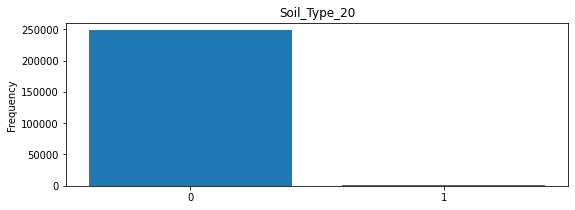

Soil_Type_20: 
 0    248105
1      1895
Name: Soil_Type_20, dtype: int64


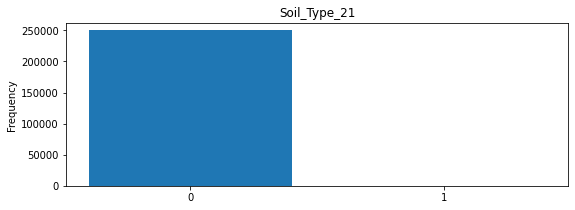

Soil_Type_21: 
 0    249843
1       157
Name: Soil_Type_21, dtype: int64


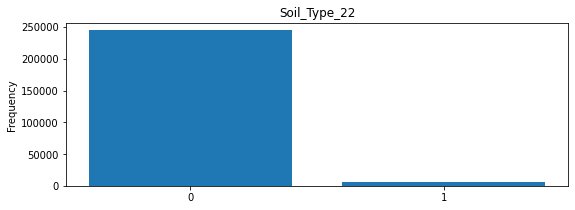

Soil_Type_22: 
 0    244499
1      5501
Name: Soil_Type_22, dtype: int64


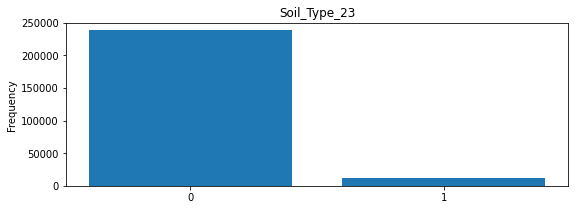

Soil_Type_23: 
 0    238110
1     11890
Name: Soil_Type_23, dtype: int64


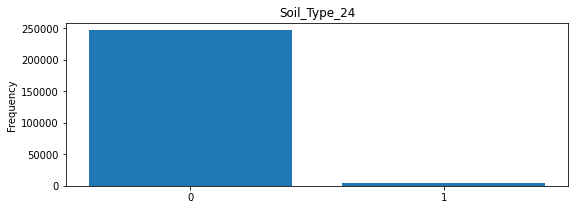

Soil_Type_24: 
 0    246150
1      3850
Name: Soil_Type_24, dtype: int64


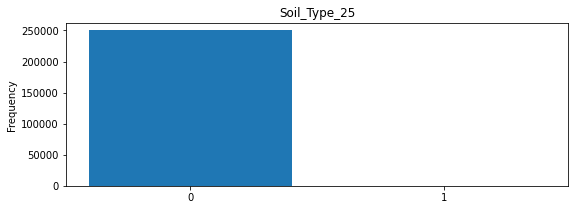

Soil_Type_25: 
 0    249942
1        58
Name: Soil_Type_25, dtype: int64


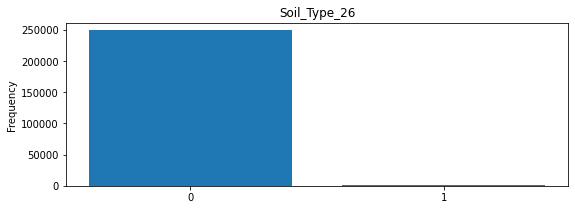

Soil_Type_26: 
 0    249203
1       797
Name: Soil_Type_26, dtype: int64


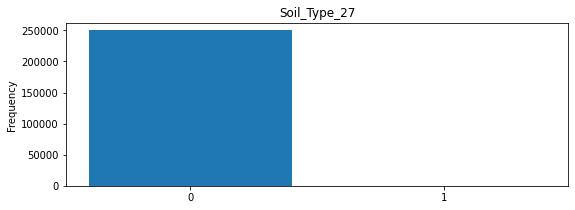

Soil_Type_27: 
 0    249789
1       211
Name: Soil_Type_27, dtype: int64


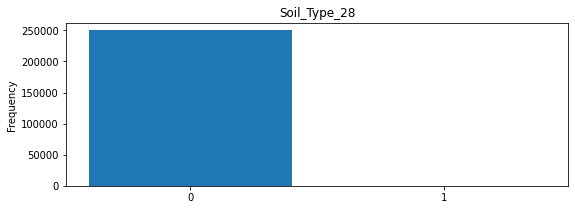

Soil_Type_28: 
 0    249850
1       150
Name: Soil_Type_28, dtype: int64


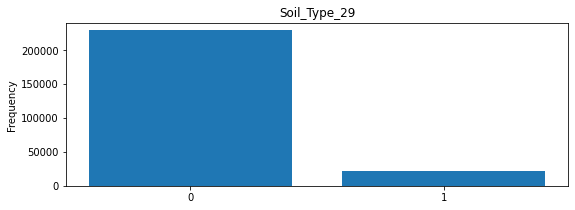

Soil_Type_29: 
 0    228818
1     21182
Name: Soil_Type_29, dtype: int64


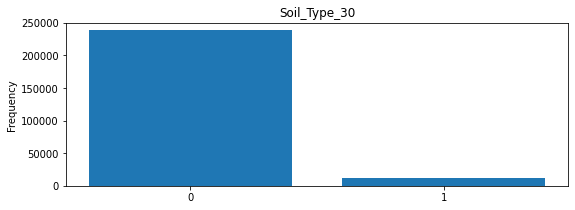

Soil_Type_30: 
 0    238262
1     11738
Name: Soil_Type_30, dtype: int64


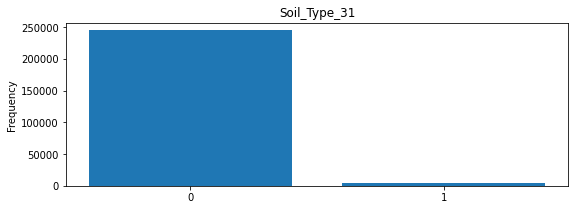

Soil_Type_31: 
 0    245003
1      4997
Name: Soil_Type_31, dtype: int64


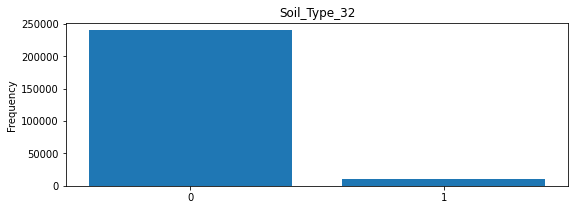

Soil_Type_32: 
 0    239605
1     10395
Name: Soil_Type_32, dtype: int64


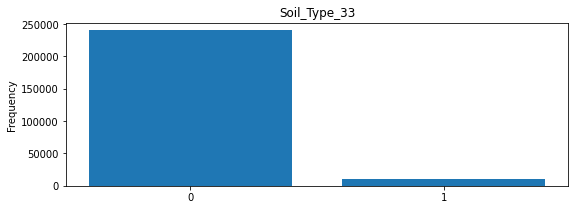

Soil_Type_33: 
 0    240030
1      9970
Name: Soil_Type_33, dtype: int64


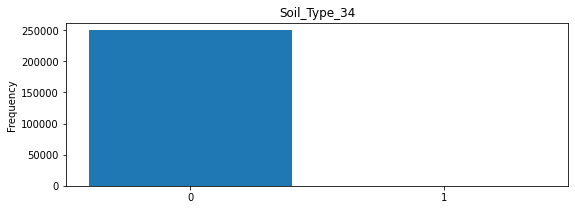

Soil_Type_34: 
 0    249625
1       375
Name: Soil_Type_34, dtype: int64


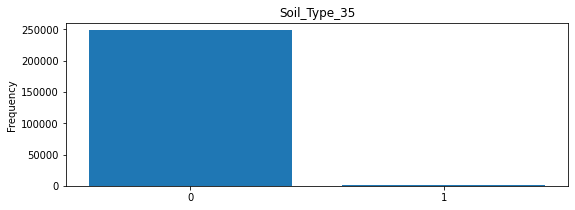

Soil_Type_35: 
 0    248384
1      1616
Name: Soil_Type_35, dtype: int64


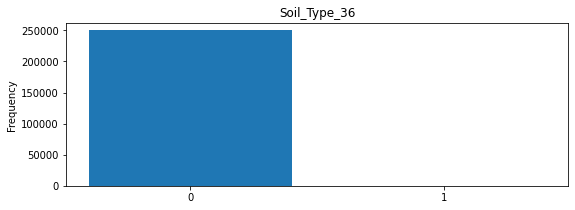

Soil_Type_36: 
 0    249901
1        99
Name: Soil_Type_36, dtype: int64


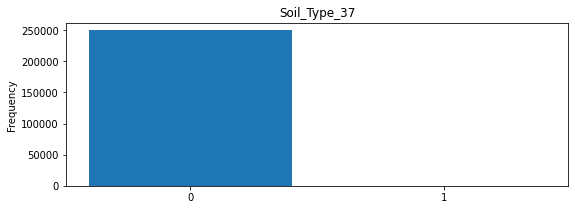

Soil_Type_37: 
 0    249537
1       463
Name: Soil_Type_37, dtype: int64


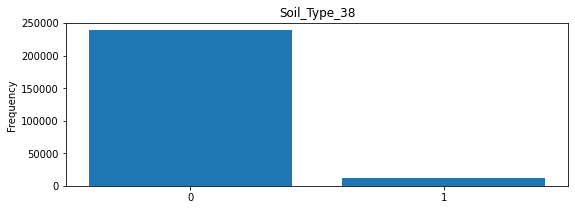

Soil_Type_38: 
 0    238495
1     11505
Name: Soil_Type_38, dtype: int64


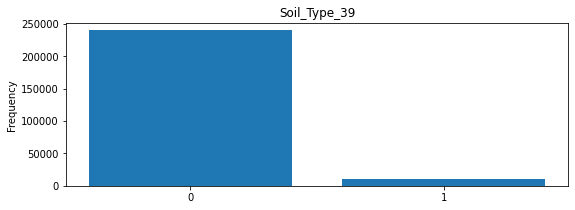

Soil_Type_39: 
 0    239653
1     10347
Name: Soil_Type_39, dtype: int64


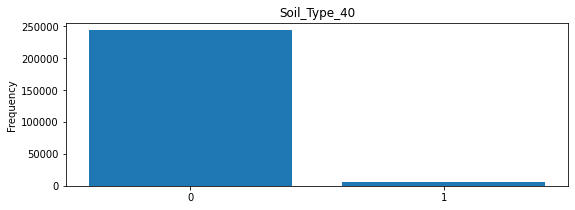

Soil_Type_40: 
 0    243277
1      6723
Name: Soil_Type_40, dtype: int64


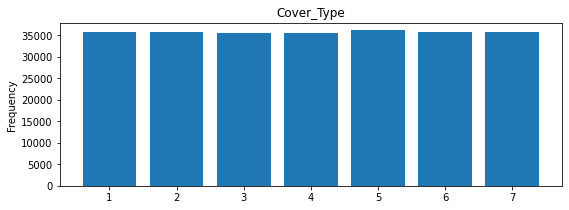

Cover_Type: 
 5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64


In [ ]:
category1 = [ 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
       'Cover_Type']
for c in category1:
    bar_plot(c)

these columns has few information so we cannot train data exactly,therefore we need to drop these columns

In [5]:
df.drop(columns=['Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_15','Soil_Type_19','Soil_Type_21',
                 'Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_34','Soil_Type_36',
                 'Soil_Type_37'],axis=1, inplace=True)

In [ ]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


###Numeric Variables

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

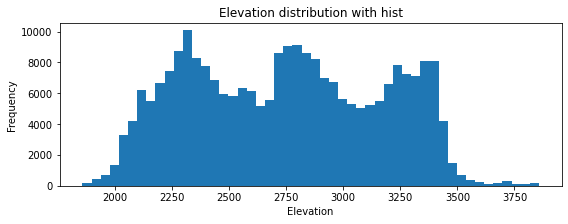

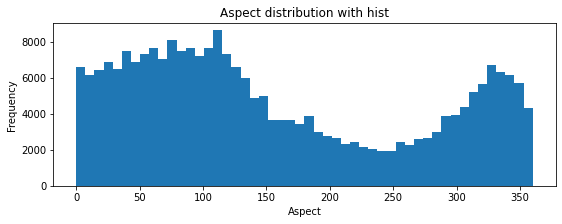

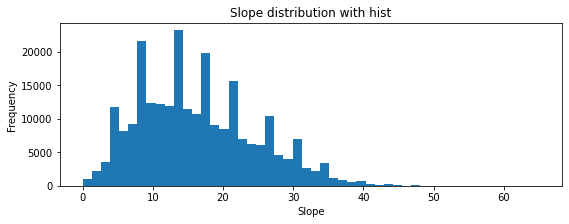

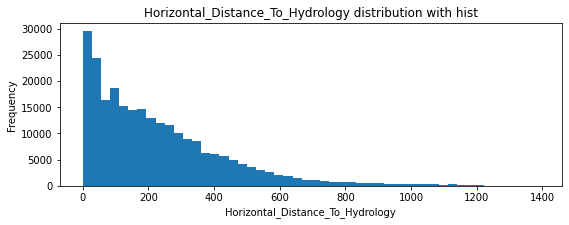

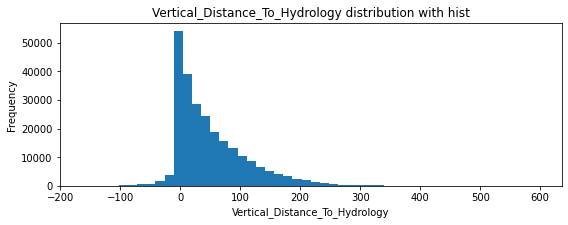

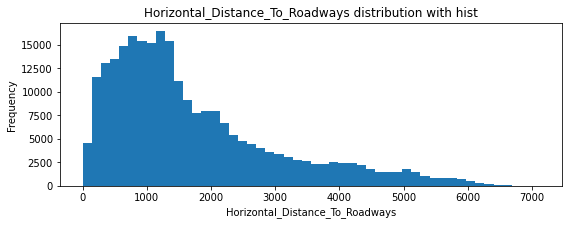

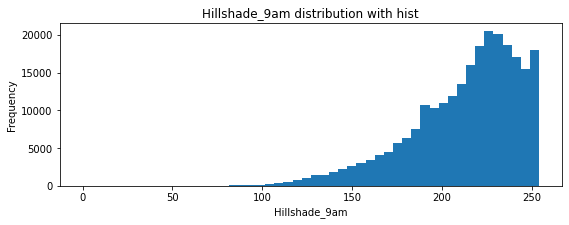

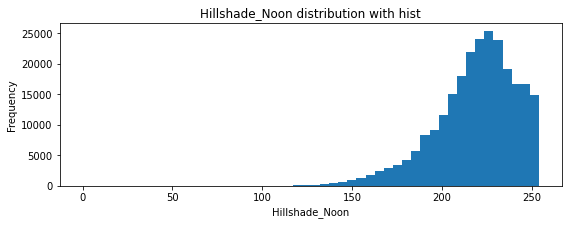

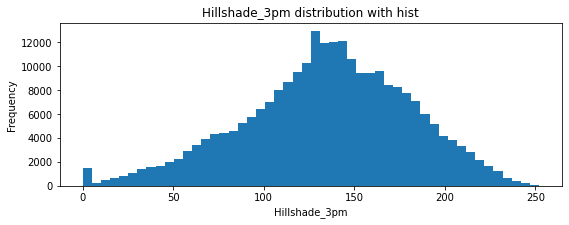

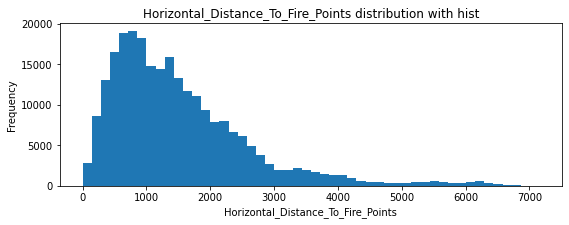

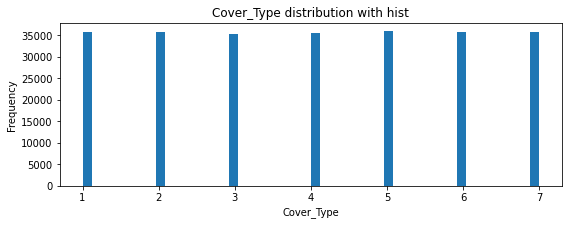

In [ ]:
numericVar = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Cover_Type']
for n in numericVar:
    plot_hist(n)

In [ ]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_20,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_35,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


### Deal with Outliers

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [6]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [7]:
from collections import Counter

In [ ]:
df.loc[detect_outliers(df,['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Cover_Type'])]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
589,2723,77,49,106,62,118,222,100,0,1291,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
855,2258,333,42,112,59,1495,92,149,175,980,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1487,3375,345,41,240,92,1113,111,144,150,1550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1556,3060,359,43,127,27,2790,121,124,114,2282,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1562,2327,126,44,365,227,747,245,169,1,315,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113483,3393,344,36,264,154,4576,127,159,155,4014,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7
235000,3391,350,38,255,147,4599,124,147,141,4025,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7
242206,2627,349,36,30,23,2460,132,158,148,6841,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
123569,3292,74,37,60,39,4006,235,146,0,4128,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7


#### *ii. Drop Outliers*

In [8]:
df.drop(detect_outliers(df,['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Cover_Type']), inplace=True)

In [ ]:
df.shape

(248168, 42)

### Now, let's take a closer look at correlation of continuous columns.

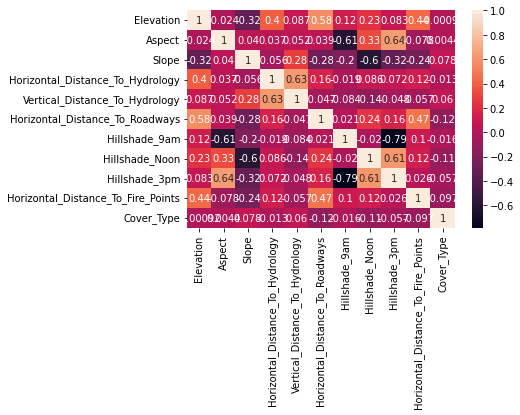

In [ ]:
sns.heatmap(df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Cover_Type']].corr(), annot = True)
plt.show()

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

###As we know about that Aspect is in degrees azimuth, we can try to shift it at 180

In [9]:
def r(x):
    if x+180>360:
        return x-180
    else:
        return x+180

df['Aspect2'] = df.Aspect.map(r)

In [10]:
df.drop(['Aspect'], axis=1, inplace=True)

###Finally, we can create some features from those which have similar meanings, f.e. distances

In [11]:
df['Elevation-VerticalDisHydro'] = df.Elevation-df.Vertical_Distance_To_Hydrology


df['Elevation-HorizontalDisHydro'] = df.Elevation-df.Horizontal_Distance_To_Hydrology*0.2


df['Distanse_to_Hydrolody'] = (df['Horizontal_Distance_To_Hydrology']**2+df['Vertical_Distance_To_Hydrology']**2)**0.5


df['Hydro_Fire_1'] = df['Horizontal_Distance_To_Hydrology']+df['Horizontal_Distance_To_Fire_Points']

df['Hydro_Fire_2'] = abs(df['Horizontal_Distance_To_Hydrology']-df['Horizontal_Distance_To_Fire_Points'])

df['Hydro_Road_1'] = abs(df['Horizontal_Distance_To_Hydrology']+df['Horizontal_Distance_To_Roadways'])


df['Hydro_Road_2'] = abs(df['Horizontal_Distance_To_Hydrology']-df['Horizontal_Distance_To_Roadways'])

df['Fire_Road_1'] = abs(df['Horizontal_Distance_To_Fire_Points']+df['Horizontal_Distance_To_Roadways'])


df['Fire_Road_2'] = abs(df['Horizontal_Distance_To_Fire_Points']-df['Horizontal_Distance_To_Roadways'])


In [12]:
df.drop(columns=[ 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points',
                 'Horizontal_Distance_To_Roadways','Elevation'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_20',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_29',
       'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33',
       'Soil_Type_35', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
       'Cover_Type', 'Aspect2', 'Elevation-VerticalDisHydro',
       'Elevation-HorizontalDisHydro', 'Distanse_to_Hydrolody', 'Hydro_Fire_1',
       'Hydro_Fire_2', 'Hydro_Road_1', 'Hydro_Road_2', 'Fire_Road_1',
       'Fire_Road_2'],
      dtype='object')

In [ ]:
import numpy as np
from IPython.display import Image

def plotc(c1,c2):

    fig = plt.figure(figsize=(16,8))
    sel = np.array(list(df.Cover_Type.values))

    plt.scatter(c1, c2, c=sel, s=100)
    plt.xlabel(c1.name)
    plt.ylabel(c2.name)
    


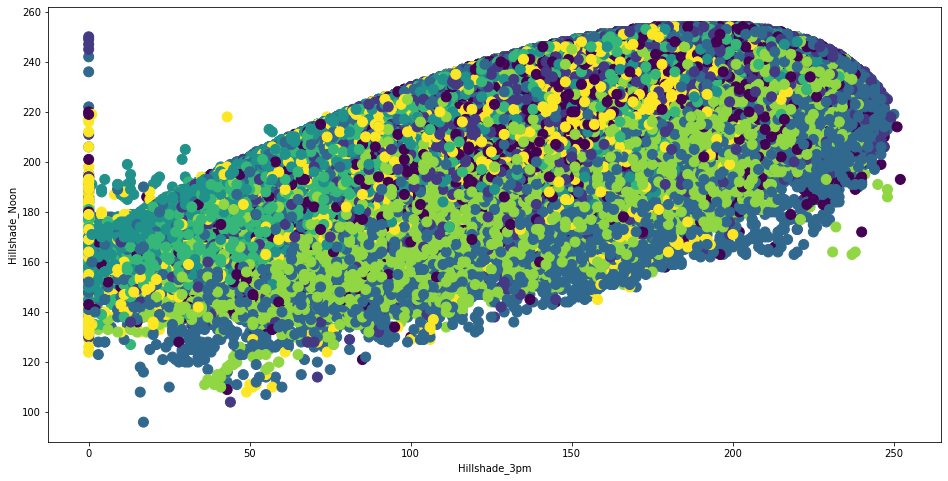

In [ ]:
plotc(df.Hillshade_3pm, df.Hillshade_Noon)

Here we can see two possible hints:  Hillshade_3pm has some values at zero which seems like some data is missing. we can try to replace those zeros with mean or try to predict their possible values with random forest. 

In [13]:
df["Hillshade_3pm"]=df["Hillshade_3pm"].apply(lambda item: df.Hillshade_3pm.mean() if  item == 0 else item) 
df["Hillshade_3pm"]

0        123.000
1         88.000
2        185.000
3         29.000
4        110.000
           ...  
249994   106.000
249995   162.000
249996    27.000
249997   139.000
249998   156.000
Name: Hillshade_3pm, Length: 248168, dtype: float64

In [ ]:
df[df.Hillshade_3pm==0]

,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_20,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_35,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Aspect2,Elevation-VerticalDisHydro,Elevation-HorizontalDisHydro,Distanse_to_Hydrolody,Hydro_Fire_1,Hydro_Fire_2,Hydro_Road_1,Hydro_Road_2,Fire_Road_1,Fire_Road_2


In [ ]:
df

,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_20,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_35,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Aspect2,Elevation-VerticalDisHydro,Elevation-HorizontalDisHydro,Distanse_to_Hydrolody,Hydro_Fire_1,Hydro_Fire_2,Hydro_Road_1,Hydro_Road_2,Fire_Road_1,Fire_Road_2
0,10,237,231,123.000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,303,2648,2653.600,217.366,2325,1901,2457,2033,4358,132
1,19,249,216,88.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,290,3229,3242.200,139.843,4094,3826,3868,3600,7694,226
2,18,170,217,185.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,142,3179,3213.800,361.292,1676,984,4715,4023,5699,3039
3,31,248,173,29.000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,269,2672,2793.000,321.753,1159,619,1590,1050,2209,431
4,12,239,221,110.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,273,3130,3146.600,520.551,1452,438,1077,63,1515,375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249994,14,243,223,106.000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,291,2545,2542.000,351.256,2134,1444,1906,1216,3350,228
249995,39,107,151,162.000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,159,2095,2102.200,51.865,484,386,516,418,902,32
249996,31,248,172,27.000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,270,2725,2821.800,290.878,759,257,2278,1776,2535,1519
249997,5,224,228,139.000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,237,2336,2336.000,0.000,387,387,1429,1429,1816,1042


***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [14]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
df

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [15]:
X=df.drop(columns=['Cover_Type'])
y=df['Cover_Type']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,stratify=y ,random_state = 42)

In [ ]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))


X_train 166272
X_test 81896
y_train 166272
y_test 81896


##Simple Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 44.91
Testing Accuracy: % 44.94


In [ ]:
scaler=MinMaxScaler()


##Hyperparameter Tuning -- Grid Search -- Cross Validation
We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

Decision Tree
SVM
Random Forest
KNN
Logistic Regression

In [ ]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             #SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state)
             #LogisticRegression(random_state = random_state)
             #KNeighborsClassifier()
             ]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

#svc_param_grid = {"kernel" : ["linear"]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

#knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 #"weights": ["uniform","distance"],
                 #"metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   #svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid
                   #knn_param_grid
                    ]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


##classifiers

##Feature selection
ExtraTreesClassifier
GradientBoostingClassifier
RandomForestClassifier
XGBoostClassifier

In [19]:
from sklearn.model_selection import train_test_split

In [24]:
#Import libraries for data transformations

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [29]:
#get the number of rows and columns
r, c = df.shape

#get the list of columns
cols = df.columns
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)
#array of importance rank of all features  
ranks = []



#Y is the target column, X has the rest
X = X
Y = y

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.33,stratify=y ,random_state = seed)



#All features
X_all = []
#Additionally we will make a list of subsets
X_all_add =[]

#columns to be dropped
rem = []
#indexes of columns to be dropped
i_rem = []

#List of combinations
comb = []
comb.append("All+1.0")

#Add this version of X to the list 
X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])

#point where categorical data begins
size=10

#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train.iloc[:,0:size])
X_val_temp = StandardScaler().fit_transform(X_val.iloc[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train.iloc[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val.iloc[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#MinMax
#Apply transform only for non-categorical data
X_temp = MinMaxScaler().fit_transform(X_train.iloc[:,0:size])
X_val_temp = MinMaxScaler().fit_transform(X_val.iloc[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train.iloc[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val.iloc[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#Normalize
#Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(X_train.iloc[:,0:size])
X_val_temp = Normalizer().fit_transform(X_val.iloc[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train.iloc[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val.iloc[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#Impute
#Imputer is not used as no data is missing

#List of transformations
trans_list = []

for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    trans_list.append(trans)

In [ ]:
xtrain,ytrain,xtest,ytest=train_test_split(X,y,test_size=0.25,random_state=123)

rf=RandomForestClassifier(max_depth=8,n_estimators=5)
rf_cv_score=cross_val_score(estimator=rf,X=xtrain,y=xtest,cv=5)
print(rf_cv_score)

In [31]:
#Select top 75%,50%,25%
ratio_list = [0.75,0.50,0.25]

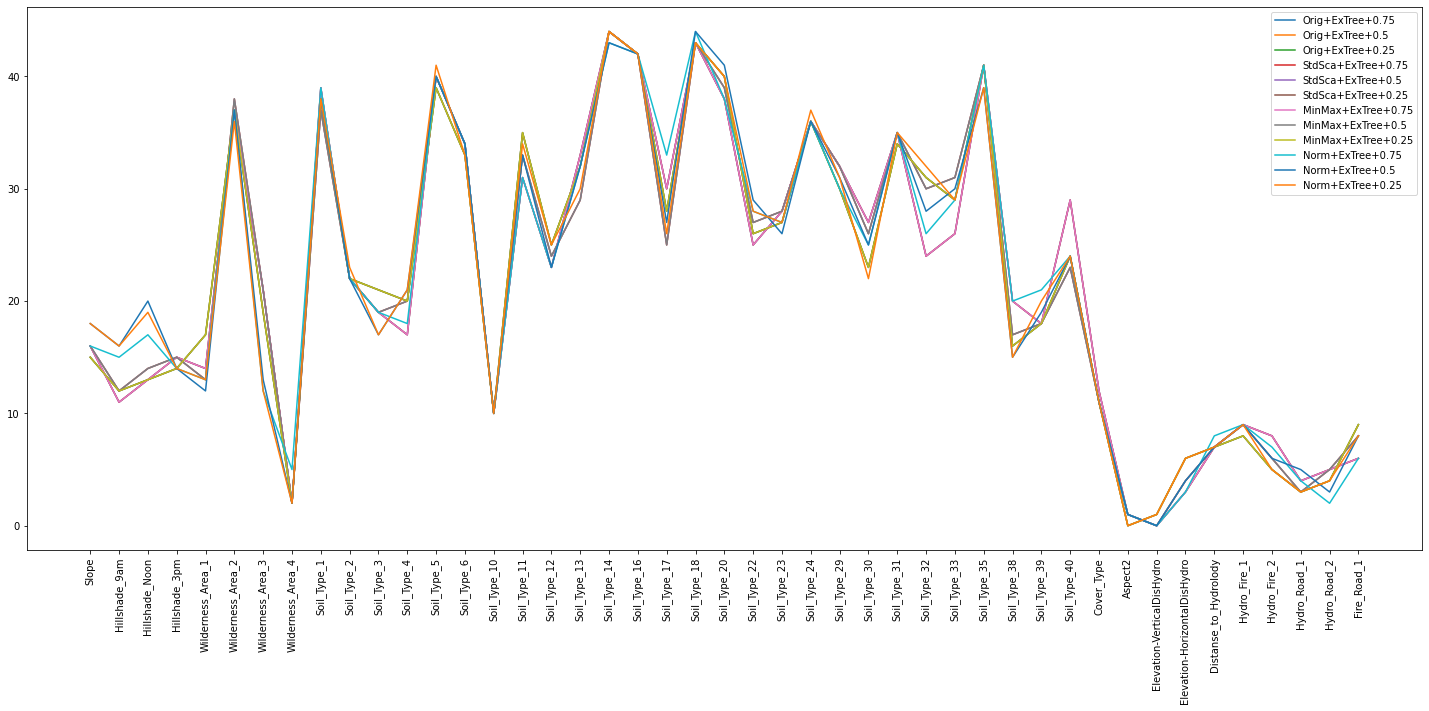

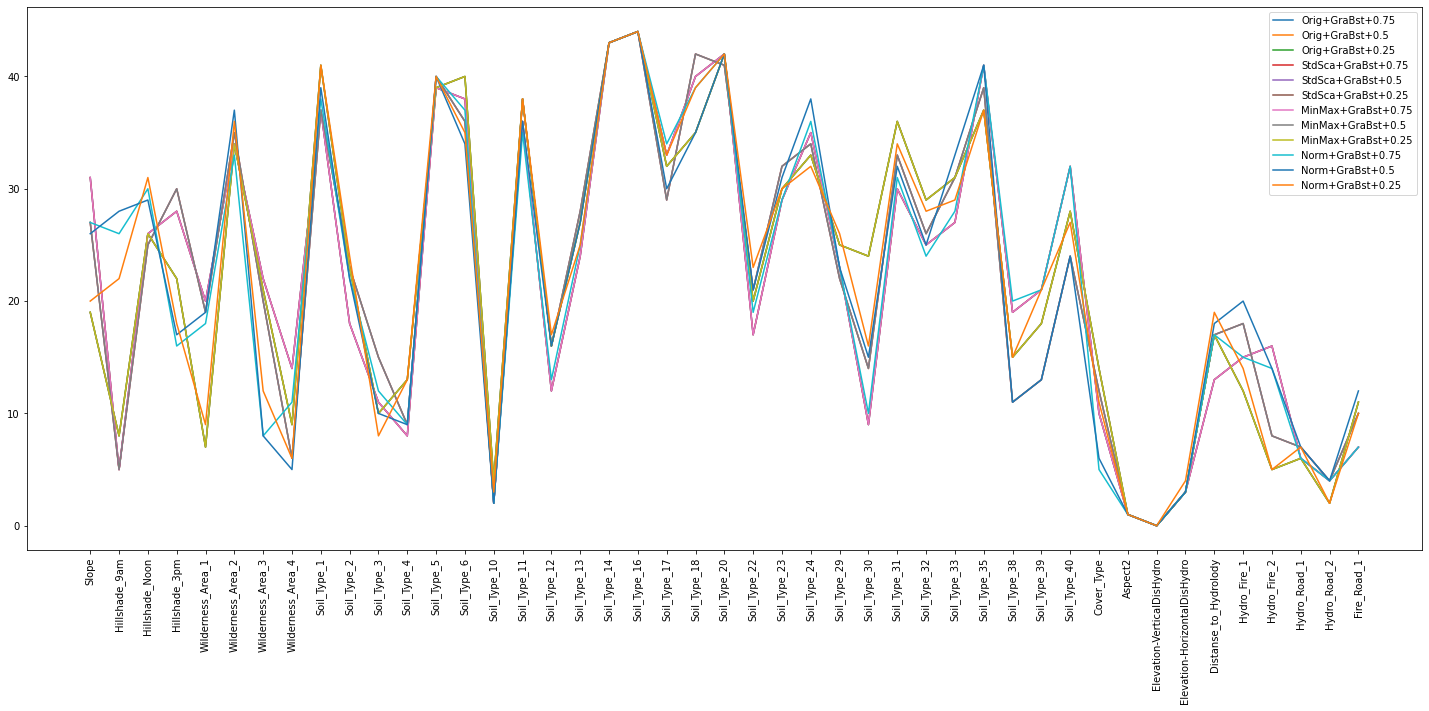

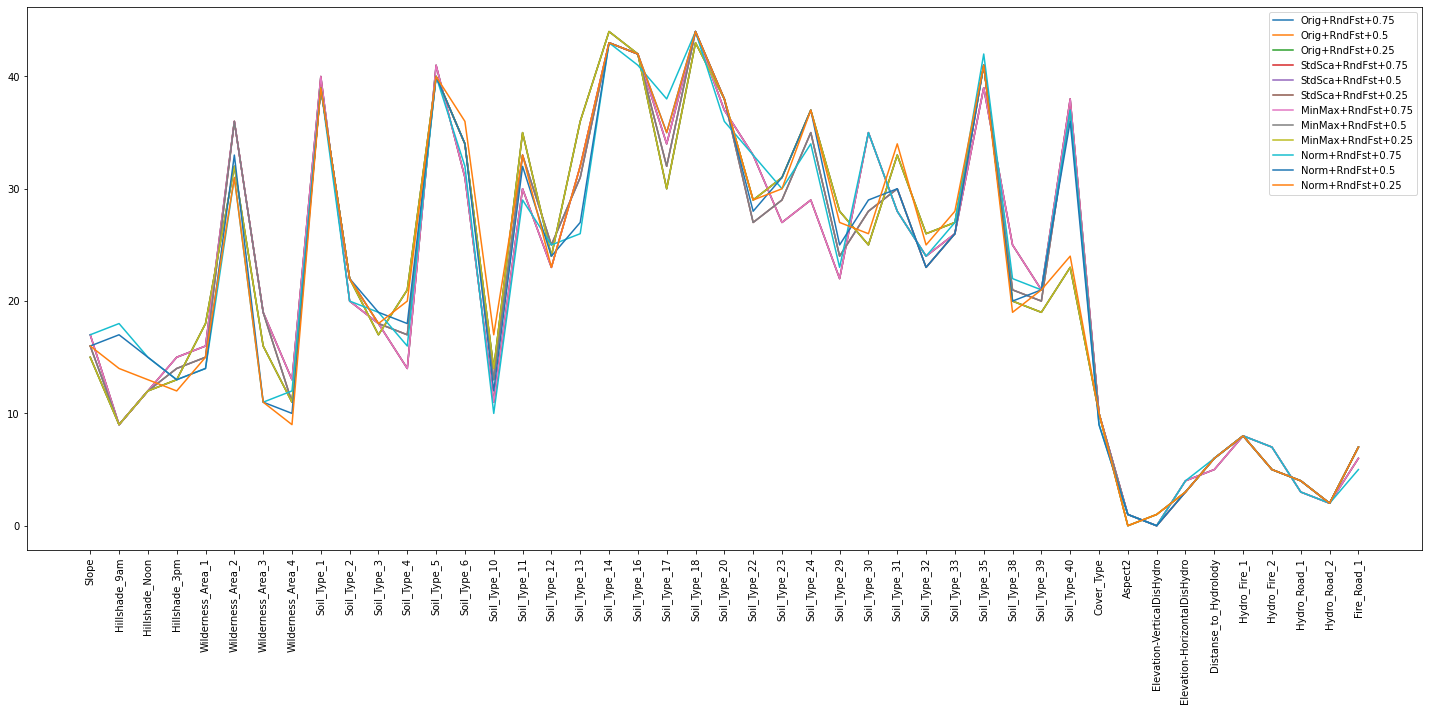

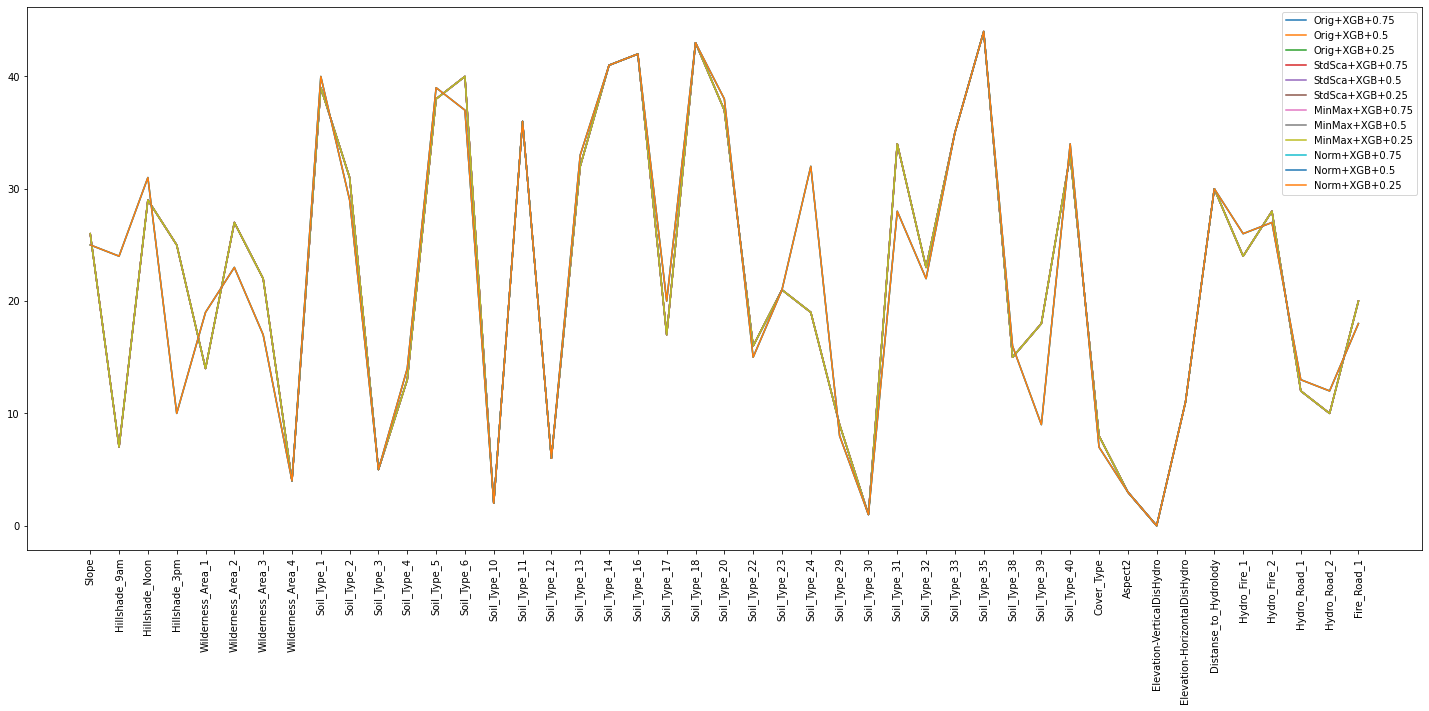

In [32]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Import the libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Add ExtraTreeClassifiers to the list
n = 'ExTree'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,ExtraTreesClassifier(n_estimators=c-1,max_features=val,n_jobs=-1,random_state=seed)])      

#Add GradientBoostingClassifiers to the list 
n = 'GraBst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,GradientBoostingClassifier(n_estimators=c-1,max_features=val,random_state=seed)])   

#Add RandomForestClassifiers to the list 
n = 'RndFst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,RandomForestClassifier(n_estimators=c-1,max_features=val,n_jobs=-1,random_state=seed)])   

#Add XGBClassifier to the list 
n = 'XGB'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,XGBClassifier(n_estimators=c-1,seed=seed)])   
        
#For all transformations of X
for trans,s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name,v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.feature_importances_)):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: -x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])    

#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()

Evaluation, prediction, and analysis
Bagged Decision Trees (Bagging)

In [1]:
#Evaluation of various combinations of Bagged Decision Trees using all the views

#Import the library
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Base estimator
base_estimator = DecisionTreeClassifier(random_state=seed,max_depth=13)

n_list = [100]

for n_estimators in n_list:
    #Set the base model
    model = BaggingClassifier(n_jobs=-1,base_estimator=base_estimator, n_estimators=n_estimators, random_state=seed)
   
    algo = "Bag"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is close to 82% when n_estimators is 100 for Original

NameError: ignored

Evaluation, prediction, and analysis
Random Forest (Bagging)

In [ ]:
#Evaluation of various combinations of Random Forest using all the views

#Import the library
from sklearn.ensemble import RandomForestClassifier

n_list = [100]

for n_estimators in n_list:
    #Set the base model
    model = RandomForestClassifier(n_jobs=-1,n_estimators=n_estimators, random_state=seed)
   
    algo = "RF"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is close to 85% when n_estimators is 100

Evaluation, prediction, and analysis
Extra Trees (Bagging)

In [ ]:
#Evaluation of various combinations of Extra Trees using all the views

#Import the library
from sklearn.ensemble import ExtraTreesClassifier

n_list = [100]

for n_estimators in n_list:
    #Set the base model
    model = ExtraTreesClassifier(n_jobs=-1,n_estimators=n_estimators, random_state=seed)
   
    algo = "ET"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is close to 88% when n_estimators is 100 , StdScaler with 0.75

Evaluation, prediction, and analysis
Gradient Boosting (Boosting)

In [ ]:
#Evaluation of various combinations of Stochastic Gradient Boosting using all the views

#Import the library
from sklearn.ensemble import GradientBoostingClassifier

d_list = [9]

for max_depth in d_list:
    #Set the base model
    model = GradientBoostingClassifier(max_depth=max_depth, random_state=seed)
   
    algo = "SGB"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with d=%s+%s of %s" % (algo,max_depth,"All",1.0))

    ##Accuracy of the model using a subset of features    
    #for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    #    model.fit(X[:,i_cols_list],Y_train)
    #    result = model.score(X_val[:,i_cols_list], Y_val)
    #    acc[trans].append(result)
    #    #print(trans+"+"+name+"+%d" % (v*(c-1)))
    #    #print(result)
    #for v in ratio_list:
    #    comb.append("%s with d=%s+%s of %s" % (algo,max_depth,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#training time is too high
#Best estimated performance is close to 86% when depth is 7

Evaluation, prediction, and analysis
XGBoost

In [ ]:
#Evaluation of various combinations of XG Boost using all the views

#Import the library
from xgboost import XGBClassifier

n_list = [300]

for n_estimators in n_list:
    #Set the base model
    model = XGBClassifier(n_estimators=n_estimators, seed=seed,subsample=0.25)
   
    algo = "XGB"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is close to 80% when n_estimators is 300, sub_sample=0.25 , subset=0.75

##Make Predictions

In [ ]:
# Make predictions using Extra Tress Classifier + 0.5 subset as it gave the best estimated performance

n_estimators = 100

#Obtain the list of indexes for the required model
indexes = []
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    if v == 0.5:
        if trans == 'Orig':
            indexes = i_cols_list
            break

#Best model definition
best_model = ExtraTreesClassifier(n_jobs=-1,n_estimators=n_estimators)
best_model.fit(X_orig[:,indexes],Y)

#Read test dataset
dataset_test = df


#Make predictions using the best model
predictions = best_model.predict(X_test)
# Write submissions to output file in the correct format
with open("submission.csv", "w") as subfile:
    subfile.write("Id,Cover_Type\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))